<a href="https://colab.research.google.com/github/Rohit2303A510J0/23CSBTB28/blob/main/ASSIGNMENT_2/a2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PART 1: Implement Breadth First Search Algorithm using a Queue

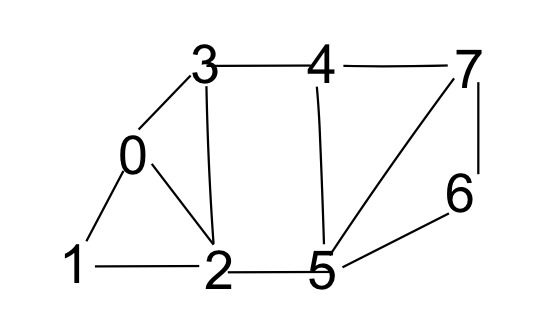

OUTPUT: 1-->0-->2-->3-->5-->4-->6-->7-->

In [1]:
from queue import Queue
graph = {0: [1, 2, 3],
         1: [0, 2],
         2: [1, 3, 5],
         3: [0, 2, 4],
         4: [3, 5, 7],
         5: [2, 4, 6, 7],
         6: [5, 7],
         7: []}
print("The adjacency list representing the graph is:")
print(graph)

def bfs(graph, source):
  Q = Queue()
  visited_vertices = set()
  Q.put(source)
  visited_vertices.update({source})
  while not Q.empty():
    vertex = Q.get()
    print(vertex, end="-->")
    for adjacent_vertex in graph[vertex]:
      if adjacent_vertex not in visited_vertices:
        Q.put(adjacent_vertex)
        visited_vertices.update({adjacent_vertex})

print("BFS traversal of graph with source 1 is: ")
bfs(graph, 1)

The adjacency list representing the graph is:
{0: [1, 2, 3], 1: [0, 2], 2: [1, 3, 5], 3: [0, 2, 4], 4: [3, 5, 7], 5: [2, 4, 6, 7], 6: [5, 7], 7: []}
BFS traversal of graph with source 1 is: 
1-->0-->2-->3-->5-->4-->6-->7-->

PART 2: Implement Depth First Search Algorithm using a Stack

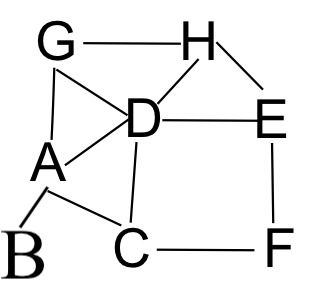

OUTPUT: ['B', 'A', 'C', 'D', 'E', 'H', 'G', 'F']

In [3]:
graph1 = {
'A' : ['B','C', 'D', 'G'],
'B' : ['A'],
'C' : ['A','D','F'],
'D' : ['A','C','E', 'G', 'H'],
'E' : ['D','H','F'],
'F' : ['C','E'],
'G' : ['A','D','H'],
'H' : ['D','E','G']
}


def dfs(graph, node, visited):
  if node not in visited:
    visited.append(node)
    for k in graph[node]:
      dfs(graph,k, visited)
  return visited


visited = dfs(graph1,'B', [])
print(visited)

['B', 'A', 'C', 'D', 'E', 'H', 'G', 'F']


PART 3: Implement A* Search Algorithm using numpy

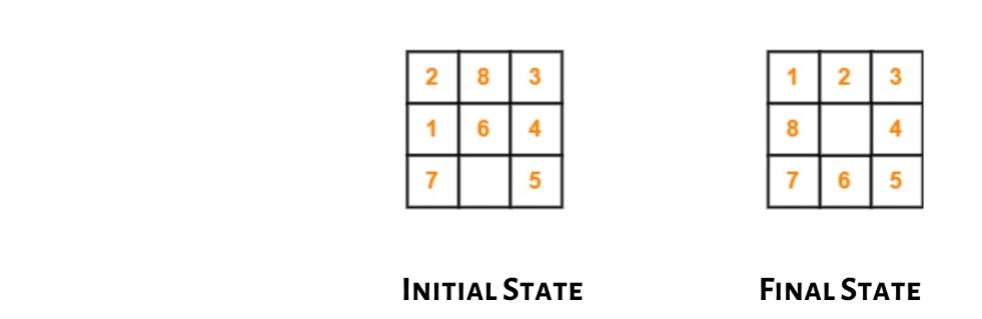

In [4]:
from copy import deepcopy
import numpy as np
import time


def best_solution(state):
    best_sol = np.array([], int).reshape(-1, 9)
    count = len(state) - 1
    while count != -1:
        best_sol = np.insert(best_sol, 0, state[count]['puzzle'], 0)
        count = state[count]['parent']
    return best_sol.reshape(-1, 3, 3)


# Checks for the uniqueness of the iteration.
def all_unique(checkarray):
    seen = set()
    for item in checkarray:
        if tuple(item) in seen:
            return 0
        seen.add(tuple(item))
    return 1


# Number of misplaced tiles
def misplaced_tiles(puzzle, goal):
    mscost = np.sum(puzzle != goal) - 1
    return mscost if mscost > 0 else 0


def coordinates(puzzle):
    pos = np.array(range(9))
    for p, q in enumerate(puzzle):
        pos[q] = p
    return pos


# Start of 8 puzzle evaluation, using Misplaced tiles heuristics
def evaluate_misplaced(puzzle, goal):
    steps = np.array([('up', [0, 1, 2], -3), ('down', [6, 7, 8], 3), ('left', [0, 3, 6], -1), ('right', [2, 5, 8], 1)],
                     dtype=[('move', str, 1), ('position', list), ('head', int)])

    dtstate = [('puzzle', list), ('parent', int), ('gn', int), ('hn', int)]
    costg = coordinates(goal)

    # Initializing the parent, gn and hn, where hn is misplaced_tiles function call
    parent = -1
    gn = 0
    hn = misplaced_tiles(coordinates(puzzle), costg)
    state = np.array([(puzzle, parent, gn, hn)], dtstate)

    # Priority queues with position as keys and fn as value.
    dtpriority = [('position', int), ('fn', int)]
    priority = np.array([(0, hn)], dtpriority)

    while True:
        priority = np.sort(priority, kind='mergesort', order=['fn', 'position'])
        position, fn = priority[0]
        # Sort priority queue using merge sort, the first element is picked for exploring.
        priority = np.delete(priority, 0, 0)

        puzzle, parent, gn, hn = state[position]
        puzzle = np.array(puzzle)
        blank = int(np.where(puzzle == 0)[0])

        gn += 1
        start_time = time.time()
        for s in steps:
            if blank not in s['position']:
                openstates = deepcopy(puzzle)
                openstates[blank], openstates[blank + s['head']] = openstates[blank + s['head']], openstates[blank]

                if not (np.all(list(state['puzzle']) == openstates, 1)).any():
                    end_time = time.time()
                    if (end_time - start_time) > 2:
                        print("The 8 puzzle is unsolvable\n")
                        return state, len(priority)

                hn = misplaced_tiles(coordinates(openstates), costg)
                # Generate and add new state in the list
                q = np.array([(openstates, position, gn, hn)], dtstate)
                state = np.append(state, q, 0)
                # f(n) is the sum of cost to reach node
                fn = gn + hn
                q = np.array([(len(state) - 1, fn)], dtpriority)
                priority = np.append(priority, q, 0)

                if np.array_equal(openstates, goal):
                    print('The 8 puzzle is solvable\n')
                    return state, len(priority)

    return state, len(priority)


# Initial state
puzzle = [2, 8, 3, 1, 6, 4, 7, 0, 5]

# Goal state
goal = [1, 2, 3, 8, 0, 4, 7, 6, 5]

state, visited = evaluate_misplaced(puzzle, goal)
best_path = best_solution(state)
print(str(best_path).replace('[', ' ').replace(']', ''))
total_moves = len(best_path) - 1
print('\nSteps to reach goal:', total_moves)
visit = len(state) - visited
print('Total nodes visited:', visit, "\n")


The 8 puzzle is solvable

   2 8 3
   1 6 4
   7 0 5

   2 8 3
   1 0 4
   7 6 5

   2 0 3
   1 8 4
   7 6 5

   0 2 3
   1 8 4
   7 6 5

   1 2 3
   0 8 4
   7 6 5

   1 2 3
   8 0 4
   7 6 5

Steps to reach goal: 5
Total nodes visited: 8 



<ipython-input-4-ee3fc6ffa229>:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  blank = int(np.where(puzzle == 0)[0])
